In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
from datasets import load_from_disk
from nltk.tokenize import word_tokenize

INPUT_TOKEN_LIMIT = 1024
TASK_PROMPT = "<LM> Сократи текст: "
tokenizer = AutoTokenizer.from_pretrained("ai-forever/FRED-T5-large")

In [2]:
def get_words_num(text):
	return len([token for token in word_tokenize(text, language='russian') if token.isalpha()])

def collect_stats(example):
    return {
		"input_tokens": len(tokenizer(TASK_PROMPT+example["text"], truncation=False)["input_ids"]),
		"word_num": get_words_num(example["text"]),
	}

def is_short_enough(example):
    return example["input_tokens"] < INPUT_TOKEN_LIMIT

def describe(df, cols= ("input_tokens", "word_num")):
    for i, col in enumerate(cols):
        print(df[col].describe(), end="\n\n" if i < len(cols)-1 else "\n")

# NPlus1

In [3]:
nplus = load_dataset("cointegrated/taiga_stripped_rest", split="NPlus1")
nplus.shape

(7000, 2)

In [4]:
nplus = nplus.map(collect_stats, num_proc=4)

Map (num_proc=4):   0%|          | 0/7000 [00:00<?, ? examples/s]

In [5]:
df = nplus.to_pandas()
describe(nplus.to_pandas())

count    7000.000000
mean      411.173286
std       211.463315
min        10.000000
25%       261.000000
50%       369.000000
75%       523.000000
max      2442.000000
Name: input_tokens, dtype: float64

count    7000.000000
mean      220.872857
std       110.441831
min         1.000000
25%       142.000000
50%       201.000000
75%       282.000000
max      1087.000000
Name: word_num, dtype: float64


<Axes: >

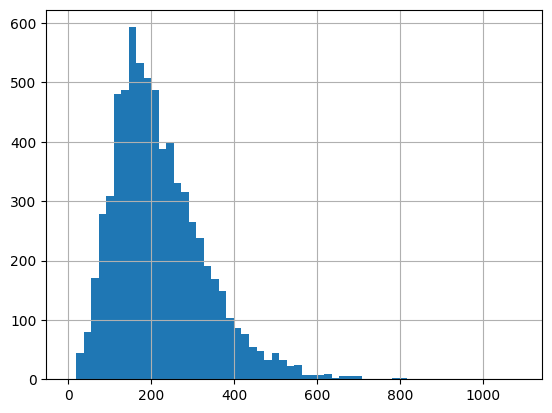

In [6]:
df['word_num'].hist(bins=60)

<Axes: >

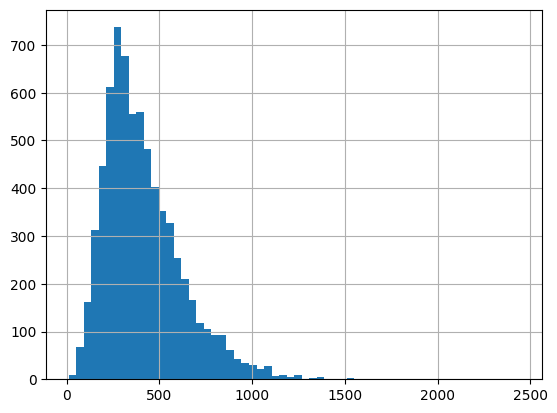

In [7]:
df['input_tokens'].hist(bins=60)

# Fontanka

In [8]:
fontanka = load_dataset("cointegrated/taiga_stripped_rest", split="Fontanka")
fontanka.shape

(342683, 2)

In [9]:
fontanka = fontanka.map(collect_stats, num_proc=8)

In [10]:
fontanka_filtered = fontanka.filter(is_short_enough, num_proc=8)

In [11]:
fontanka_filtered = fontanka_filtered.filter(lambda x: 300 < x["word_num"] < 600, num_proc=8)

In [12]:
df = fontanka_filtered.to_pandas()
describe(df)

count    17377.000000
mean       694.102319
std        146.695975
min        429.000000
25%        569.000000
50%        665.000000
75%        814.000000
max       1023.000000
Name: input_tokens, dtype: float64

count    17377.000000
mean       410.333084
std         85.890342
min        301.000000
25%        335.000000
50%        388.000000
75%        479.000000
max        599.000000
Name: word_num, dtype: float64


<Axes: >

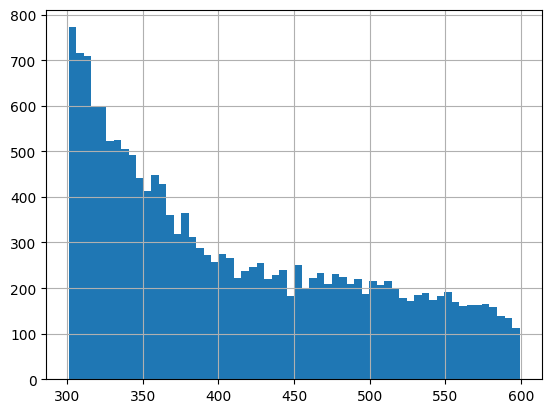

In [13]:
df['word_num'].hist(bins=60)

<Axes: >

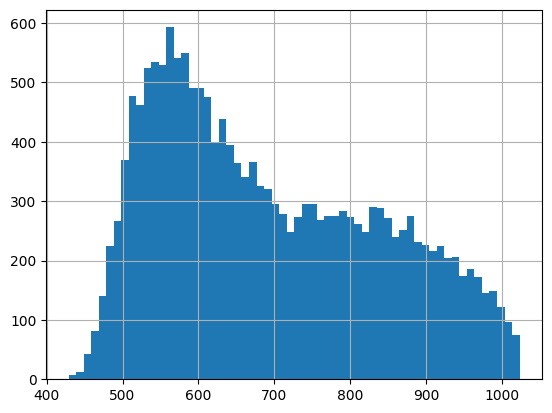

In [14]:
df['input_tokens'].hist(bins=60)

# Test for reference

In [15]:
test_dataset = load_from_disk("filtered_test")
test_df = test_dataset.to_pandas()

In [16]:
test_df["input_len"] = test_df["text"].apply(lambda x: len(x))
test_df["input_tokens"] = test_df["text"].apply(lambda x: len(tokenizer(x, truncation=False)["input_ids"]))
test_df["output_tokens"] = test_df["summary"].apply(lambda x: len(tokenizer(x, truncation=False)["input_ids"]))
test_df["input_words"] = test_df["text"].apply(lambda x: get_words_num(x))
test_df["output_words"] = test_df["summary"].apply(lambda x: get_words_num(x))

In [17]:
describe(test_df, ("input_len", "input_tokens", "output_tokens", "input_words", "output_words"))

count     247.000000
mean     1441.680162
std       793.431853
min        84.000000
25%       858.500000
50%      1258.000000
75%      1835.000000
max      4629.000000
Name: input_len, dtype: float64

count     247.000000
mean      308.975709
std       170.507133
min        24.000000
25%       182.500000
50%       276.000000
75%       404.000000
max      1011.000000
Name: input_tokens, dtype: float64

count    247.000000
mean     125.919028
std       50.505750
min       20.000000
25%       91.000000
50%      116.000000
75%      157.000000
max      292.000000
Name: output_tokens, dtype: float64

count    247.000000
mean     183.538462
std       99.466736
min       12.000000
25%      113.500000
50%      164.000000
75%      235.500000
max      613.000000
Name: input_words, dtype: float64

count    247.000000
mean      73.680162
std       26.632682
min        9.000000
25%       54.500000
50%       71.000000
75%       89.000000
max      180.000000
Name: output_words, dtype: float64
